In [1]:
#imports
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings

In [33]:
import numpy as np
import pandas as pd
train_data = pd.read_excel('movie.xlsx')

In [34]:
train_data.head() 

,text,sentiment
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [37]:
train_data.columns =['text', 'sentiment',]
train_data

,text,sentiment
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",negative
1996,"john boorman's "" zardoz "" is a goofy cinematic...",negative
1997,the kids in the hall are an acquired taste . \...,negative
1998,there was a time when john carpenter was a gre...,negative


In [39]:
train_data['sentiment'].value_counts()

positive    1000
negative    1000
Name: sentiment, dtype: int64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl 

In [43]:
train_data['Length'] = train_data['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

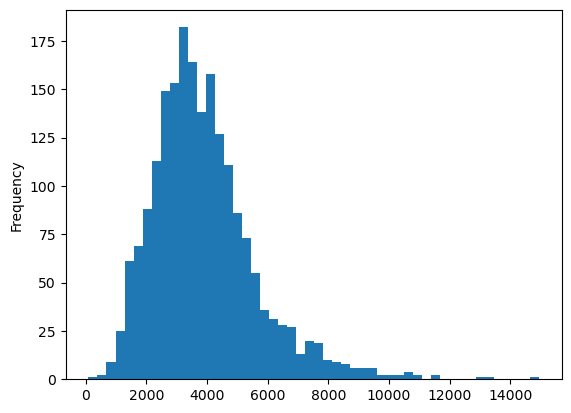

In [46]:
train_data['Length'].plot(kind = 'hist' , bins = 50) 

Text(0.5, 0.98, 'Length via each Sentiment')

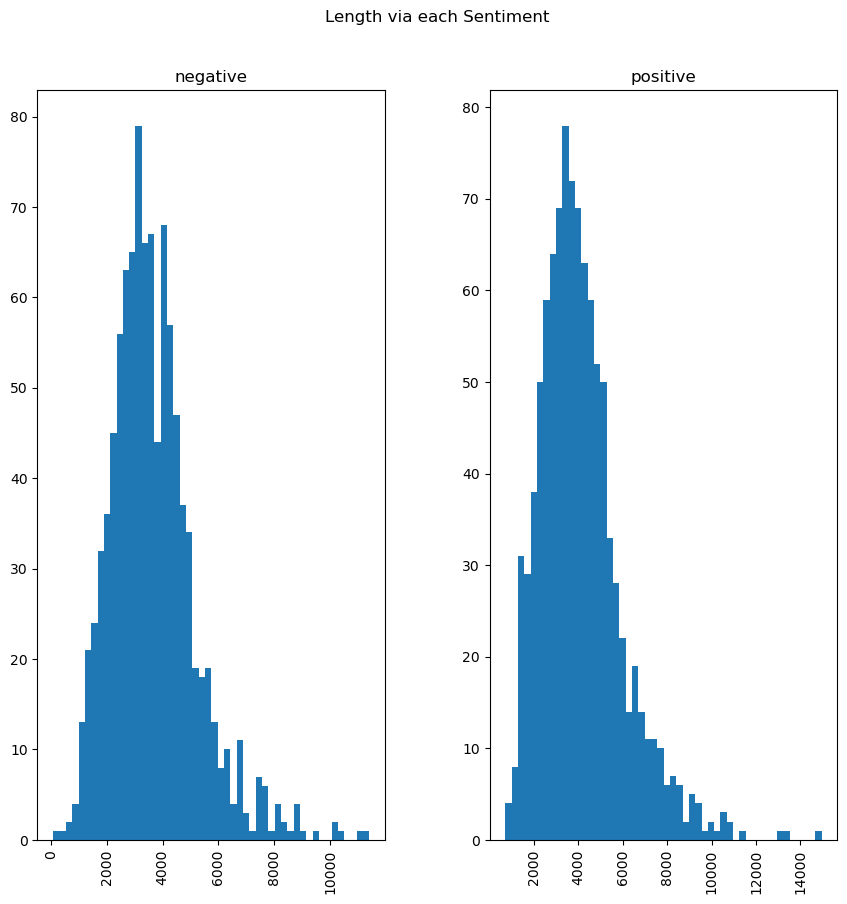

In [47]:
ax = train_data.hist(column = 'Length', by = 'sentiment', bins = 50 , figsize = (10,10));
pl.suptitle('Length via each Sentiment') 

In [80]:
def sentence_tokenize(text):
    """
    take string input and return a list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    return nltk.sent_tokenize(text)

In [ ]:
train_data['Phrase'].apply(sentence_tokenize) 

In [81]:
def word_tokenize(text):
        """
        :param text:
        :return: list of words
        """
        return nltk.word_tokenize(text)

In [82]:
def to_lower(text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower() 

In [ ]:
train_data['Phrase'].apply(to_lower) 

In [83]:
def remove_numbers(text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output 

In [84]:
def remove_punct(text):
  
        return ''.join(c for c in text if c not in punctuation) 

In [85]:
def remove_stopwords(text):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(text) if not w in stop_words])

In [86]:
def lemmatize(text):
      wordnet_lemmatizer = WordNetLemmatizer()

      lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
      return " ".join(lemmatized_word) 

In [117]:
def preprocess(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list
       

In [137]:
X = train_data["text"].apply(preprocess)
y = train_data["sentiment"]

In [138]:
X=pd.DataFrame(X)
X

,text
0,"[film, adapted, comic, book, plenty, success, ..."
1,"[every, movie, come, along, suspect, studio, e..."
2,"[got, mail, work, alot, better, deserves, orde..."
3,"[jaw, rare, film, grab, attention, show, singl..."
4,"[moviemaking, lot, like, general, manager, nfl..."
...,...
1995,"[anything, stigma, taken, warning, releasing, ..."
1996,"[john, boorman, zardoz, goofy, cinematic, deba..."
1997,"[kid, hall, acquired, taste, took, least, seas..."
1998,"[wa, time, john, carpenter, wa, great, horror,..."


In [139]:
from sklearn.feature_extraction.text import CountVectorizer 

In [140]:
bow = CountVectorizer(analyzer=preprocess) 

In [141]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [142]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

In [143]:
X

,text
0,"[film, adapted, comic, book, plenty, success, ..."
1,"[every, movie, come, along, suspect, studio, e..."
2,"[got, mail, work, alot, better, deserves, orde..."
3,"[jaw, rare, film, grab, attention, show, singl..."
4,"[moviemaking, lot, like, general, manager, nfl..."
...,...
1995,"[anything, stigma, taken, warning, releasing, ..."
1996,"[john, boorman, zardoz, goofy, cinematic, deba..."
1997,"[kid, hall, acquired, taste, took, least, seas..."
1998,"[wa, time, john, carpenter, wa, great, horror,..."


In [144]:
vec = TfidfVectorizer()
X = vec.fit_transform(X)
print(X)

  (0, 0)	1.0


In [135]:
# Apply TruncatedSVD
svd = TruncatedSVD(n_components=25, random_state=42)
X = svd.fit_transform(X)
print(len(X))
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)
print(X)
print(len(X))

  (0, 0)	1.0


ValueError: Found array with 1 feature(s) (shape=(1, 1)) while a minimum of 2 is required by TruncatedSVD.

In [ ]:
#pip install lightgbm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
#classifier = RandomForestClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline1.fit(train_data['Phrase'],train_data['Sentiment'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x000002099A3E2790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
pipeline1.score(train_data['Phrase'], train_data['Sentiment'])

0.6331475073689606

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
# integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(X, train_data['Sentiment'])

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [ ]:
pipeline.score(X, train_data['Sentiment'])

0.9419389978213507

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
# integer counts to weighted TF-IDF scores
    ('classifier', xgb.XGBClassifier())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(X, train_data['Sentiment'])

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
pipeline.score(X, train_data['Sentiment'])

0.5235614507240804

In [ ]:
from sklearn.metrics import classification_report

all_predictions = pipeline1.predict(train_data['Phrase'])
print(classification_report(train_data['Sentiment'], all_predictions))

              precision    recall  f1-score   support

           0       0.77      0.08      0.15      7072
           1       0.61      0.34      0.43     27273
           2       0.64      0.92      0.76     79582
           3       0.60      0.45      0.51     32927
           4       0.78      0.10      0.18      9206

    accuracy                           0.63    156060
   macro avg       0.68      0.38      0.41    156060
weighted avg       0.64      0.63      0.59    156060

